    LaTeX генератор таблиц (наконец-то полноценный, ориентация вертикальная):

In [5]:
print ("Введите данные:")
no_parse_data = input().split(' ')
data = [i_stolb.split() for i_stolb in no_parse_data]
# print (data)

output = "\hline\n"
for i_str in range (len (data[0])):
    for i_stolb in range (len (data)):
        output += data[i_stolb][i_str] + " & "
    output = output[0:-2] + "\\\\ \hline\n"

print (output)

Введите данные:
\hline
0 & 91 & 6.48 & 108.37 \\ \hline
3.37 & 91.25 & 6.26 & 106.48 \\ \hline
3.72 & 93.25 & 5.92 & 105.1 \\ \hline
4.01 & 94.93 & 5.52 & 103.02 \\ \hline
4.47 & 97.53 & 5.34 & 102.05 \\ \hline
4.76 & 99.15 & 4.87 & 99.25 \\ \hline
5.25 & 102.05 & 4.64 & 98.05 \\ \hline
5.47 & 103.33 & 3.8 & 93.55 \\ \hline
5.78 & 105.12 & 3.5 & 92.02 \\ \hline
6.28 & 107.15 & 3.22 & 90.25 \\ \hline
6.48 & 108.37 & 2.76 & 87.67 \\ \hline
--- & --- & 2.26 & 84.97 \\ \hline
--- & --- & 1.41 & 80.52 \\ \hline
--- & --- & 0 & 75.4 \\ \hline



    А вот горизонтальная:

In [43]:
print ("Введите данные:")
data = input()
data = data.replace(', ', " & ")
print(" & ", data, "\\\\ \hline\n")

Введите данные:
 &  10.367 & 10.638 & 10.737 & 11.198 & 10.770 & 10.336 & 9.496 & 9.342 & 9.281 \\ \hline



    Теперь основная часть:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Данные

In [38]:
U_a = [0.12, 0.53, 2.01, 10.37, 14.57, 20.41, 27.77, 30.95, 33.09, 35.12, 36.29, 37.55, 37.42, 37.38, 36.92, 35.81, 34.58, 33.18, 32.28, 31.58, 28.82,\
       26.52, 24.34, 22.20, 21.03, 20.11, 18.71, 16.50, 15.08, 15.62, 16.11, 16.32, 16.90, 16.20, 15.36, 15.42]

U_c = [2.293, 2.376, 2.687, 2.740, 2.797, 2.876, 2.963, 3.020, 3.055, 3.139, 3.222, 3.625, 3.770, 3.929, 4.311, 4.594, 4.880, 5.212, 5.425, 5.570, \
       6.193, 6.667, 7.145, 7.581, 7.810, 8.24, 8.383, 9.105, 10.317, 11.016, 11.370, 11.535, 12.101, 11.535, 10.820, 9.994]

assert (len(U_a) == len(U_c))
I_a = [U_a_i / 1e5 for U_a_i in U_a]

In [39]:
u_max = U_c[np.array(U_a).argmax()]
u_min = U_c[12 + np.array(U_a[12:]).argmin()]

print(f"u_max = {u_max}\n"
      f"u_min = {u_min}\n")

h_plank = 6.63 * 10**(-34)
m_e = 9.1 * 10**(-31)
e = 1.6*10**(-19)
U0_aprox = 2.5
l_4 = 0.5 * h_plank / np.sqrt((2 * m_e * e * (u_max + U0_aprox)))
l_5 = 0.5 * 3/2 * h_plank / np.sqrt((2 * m_e * e * (u_min + U0_aprox)))
l_6 = 0.5 * np.sqrt(5) * h_plank / np.sqrt((32 * m_e * e * (u_min - u_max)))
U0 = (4/5 * u_min - 9/5 * u_max) # in eV
l_4, l_5, l_6, U0

u_max = 3.625
u_min = 10.317



(2.4821887383808276e-10,
 2.5738658891569607e-10,
 1.3275011076247025e-10,
 1.7286000000000001)

Графики

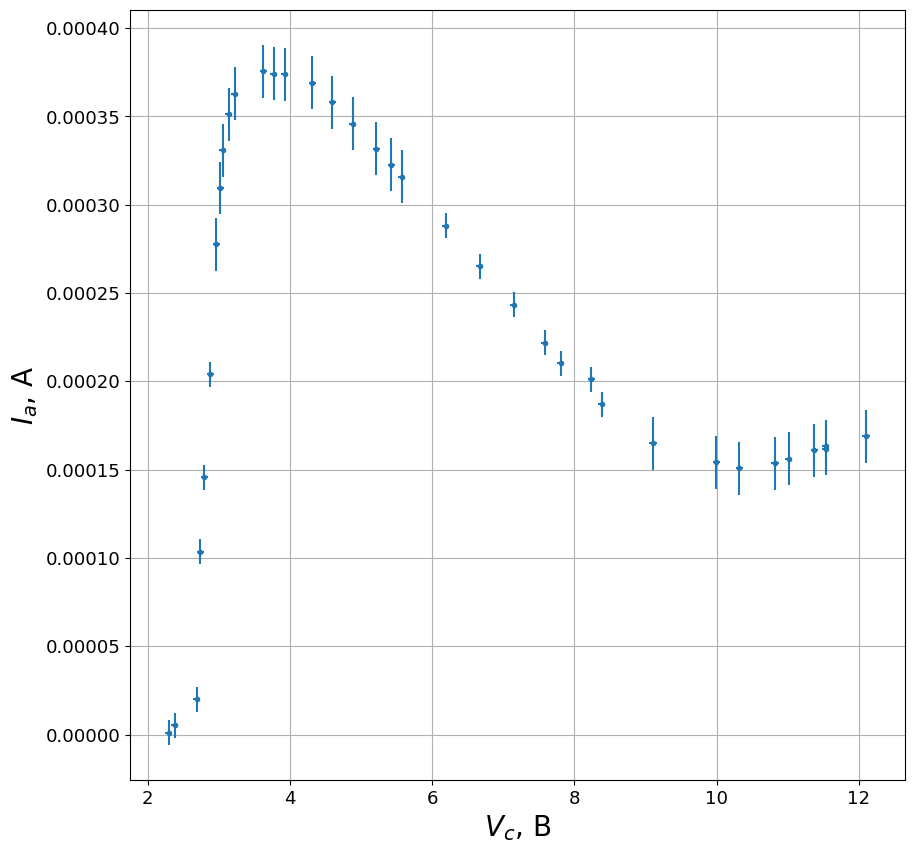

In [43]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

yerr= [0.000007] * 6 + [0.000015] * 14 + [0.000007] * 7 + [0.000015]*(len(I_a) - 6 - 14 - 7) 
ax.errorbar(U_c, I_a, xerr=0.05, yerr=yerr, fmt=".")
# ax.plot (U_c, I_a)

ax.set_xlabel ('$V_c$, В', fontsize = 20)
ax.set_ylabel ('$I_a$, А', fontsize = 20)

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("graph1.pdf")

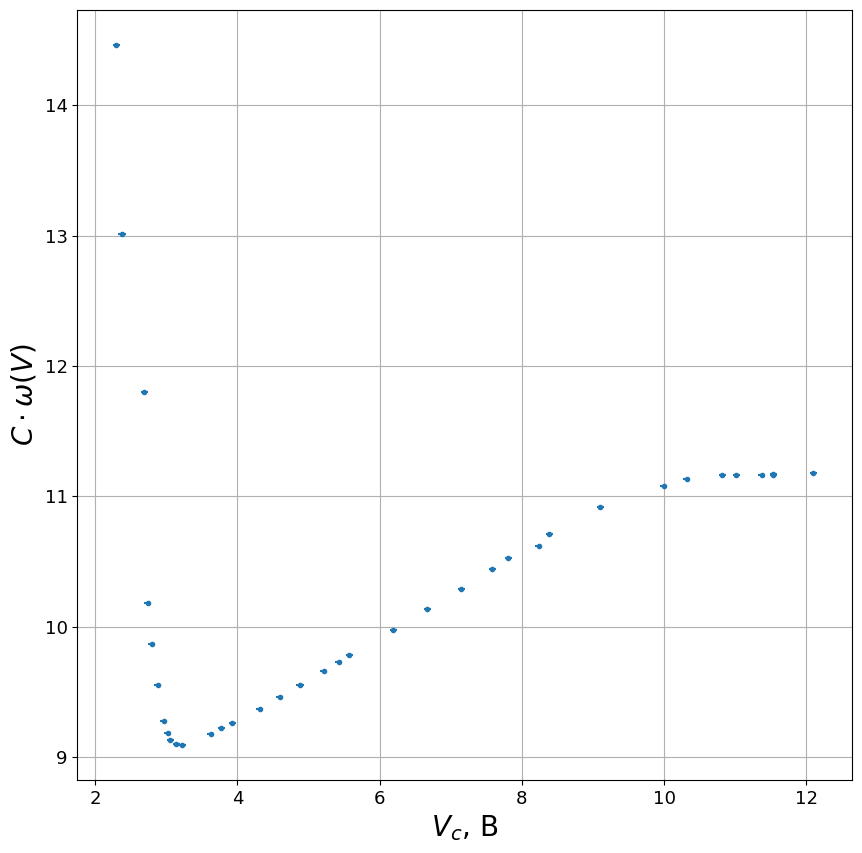

In [52]:
w = - np.log (np.array(I_a) / np.array (U_c)) 

plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)


yerr= [0.000007] * 6 + [0.000015] * 14 + [0.000007] * 7 + [0.000015]*(len(I_a) - 6 - 14 - 7) 
ax.errorbar(U_c, w, xerr=0.05, yerr=yerr, fmt=".")

ax.set_xlabel ('$V_c$, В', fontsize = 20)
ax.set_ylabel ('$C \cdot \omega(V)$', fontsize = 20)

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("graph3.pdf")

In [54]:
U_a1 = [1.68, 5.76, 18.75, 29.18, 37.82, 48.37, 52.26, 55.74, 65.69, 67.01, 68.18, \
        69.93, 70.73, 71.59, 71.80, 72.55, 73.44, 74.54, 74.47, 74.19, 73.88, 73.05, \
        72.88, 72.32, 71.16, 67.22, 66.44, 62.72, 56.06, 53.92, 52.22, 52.93, 53.35, 55.44, \
        53.91, 52.70, 53.17, 53.77, 54.06]

U_c1 = [2.387, 2.512, 2.692, 2.794, 2.884, 3.092, 3.230, 3.387, 4.039, 4.145, 4.244, 4.430, \
        4.512, 4.630, 4.649, 4.758, 4.935, 5.614, 5.899, 6.101, 6.232, 6.460, 6.535, 6.627, \
        6.812, 7.285, 7.459, 7.909, 8.798, 9.199, 10.367, 10.638, 10.737, 11.198, 10.770, \
        10.336, 9.496, 9.342, 9.281]

assert (len(U_a1) == len(U_c1))
I_a1 = [U_a_i / 1e5 for U_a_i in U_a1]

In [55]:
u1_max = U_c[np.array(U_a1).argmax()]
u1_min = U_c[11 + np.array(U_a1[11:]).argmin()]

print(f"u_max = {u1_max}\n"
      f"u_min = {u1_min}\n")

h_plank = 6.63 * 10**(-34)
m_e = 9.1 * 10**(-31)
e = 1.6*10**(-19)
U0_aprox = 2.5
l_4 = 0.5 * h_plank / np.sqrt((2 * m_e * e * (u1_max + U0_aprox)))
l_5 = 0.5 * 3/2 * h_plank / np.sqrt((2 * m_e * e * (u1_min + U0_aprox)))
l_6 = 0.5 * np.sqrt(5) * h_plank / np.sqrt((32 * m_e * e * (u1_min - u1_max)))
U01 = (4/5 * u1_min - 9/5 * u1_max) # in eV
l_4, l_5, l_6, U01

u_max = 5.212
u_min = 11.37



(2.2120978669142908e-10,
 2.474234600607289e-10,
 1.3838627390825386e-10,
 -0.2856000000000005)

In [56]:
len(U_a1)

39

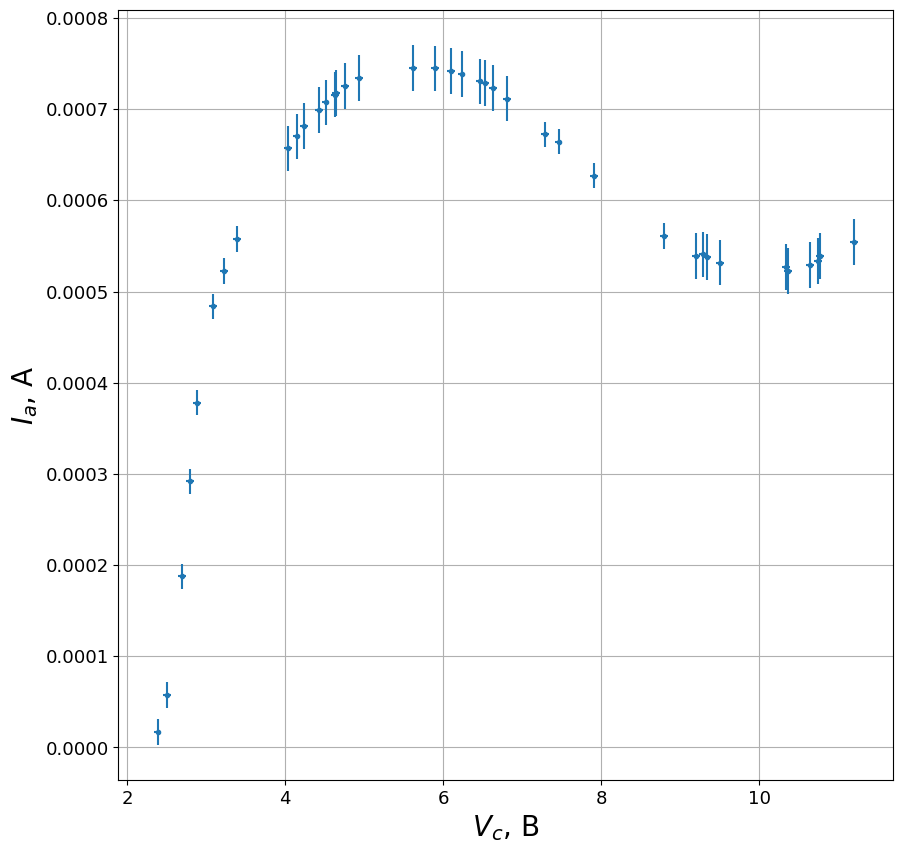

In [62]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

yerr= [0.000014] * 8 + [0.000025] * 17 + [0.000014] * 4 + [0.000025] *(len(I_a1) - 8 - 17 - 4) 
ax.errorbar(U_c1, I_a1, xerr=0.05, yerr=yerr, fmt=".")

# ax.scatter (U_c1, I_a1, marker = 'x', s=100)
# ax.plot (U_c, I_a)

ax.set_xlabel ('$V_c$, В', fontsize = 20)
ax.set_ylabel ('$I_a$, А', fontsize = 20)

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("graph2.pdf")

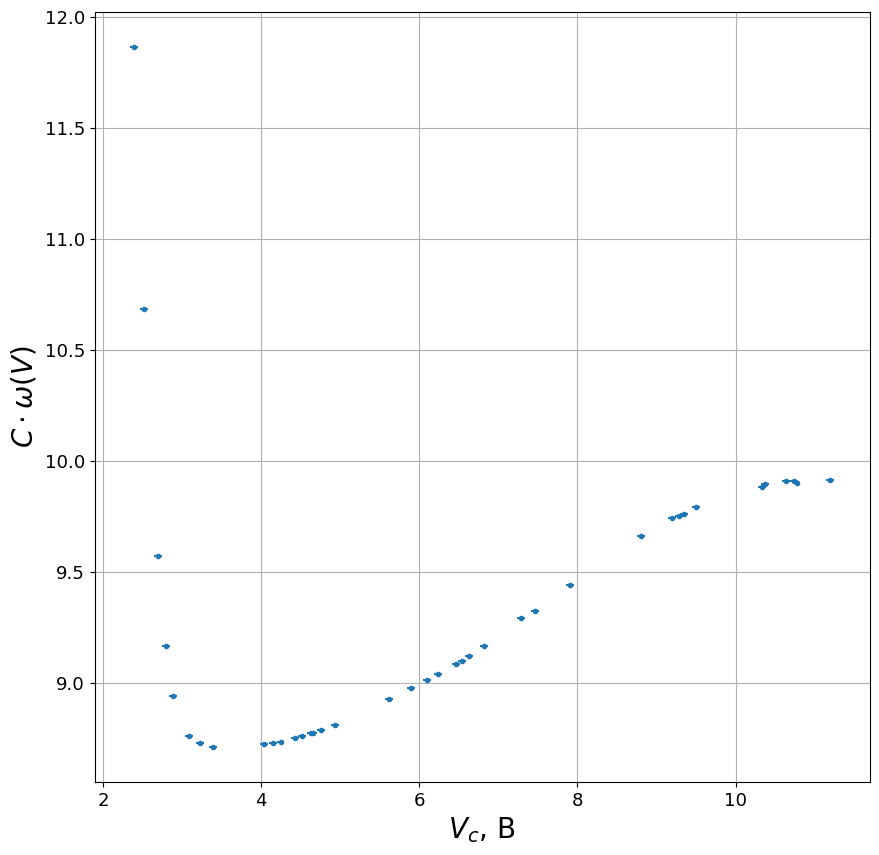

In [60]:
w = - np.log (np.array(I_a1) / np.array (U_c1)) 

plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

# ax.scatter (U_c1, w, marker = 'x', s=100)
# ax.plot (U_c, I_a)
yerr= [0.000007] * 8 + [0.000015] * 17 + [0.000007] * 4 + [0.000015] *(len(I_a1) - 8 - 17 - 4) 
ax.errorbar(U_c1, w, xerr=0.05, yerr=yerr, fmt=".")

ax.set_xlabel ('$V_c$, В', fontsize = 20)
ax.set_ylabel ('$C \cdot \omega(V)$', fontsize = 20)

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("graph4.pdf")